### Importing the required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter('ignore')

# libraries used for geographical analysis
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
from wordcloud import WordCloud, STOPWORDS  # for wordcloud analysis
import re

#### Columns description

1. url contains the url of the restaurant in the zomato website

2. address contains the address of the restaurant in Bengaluru

3. name contains the name of the restaurant

4. online_order whether online ordering is available in the restaurant or not

5. book_table table book option available or not

6. rate contains the overall rating of the restaurant out of 5

7. votes contains total number of rating for the restaurant as of the above mentioned date

8. phone contains the phone number of the restaurant

9. location contains the neighborhood in which the restaurant is located

10. rest_type restaurant type

11. dish_liked dishes people liked in the restaurant

12. cuisines food styles, separated by comma

13. approx_cost(for two people) contains the approximate cost for meal for two people

14. reviews_list list of tuples containing reviews for the restaurant, each tuple

15. menu_item contains list of menus available in the restaurant

16. listed_in(type) type of meal

17. listed_in(city) contains the neighborhood in which the restaurant is listed

### Reading the data

In [4]:
!pip install opendatasets -q

In [5]:
import opendatasets as od
od.download('https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: santhosh086
Your Kaggle Key: ··········


100%|██████████| 89.0M/89.0M [00:01<00:00, 82.5MB/s]


In [6]:
data_df = pd.read_csv('/content/zomato-bangalore-restaurants/zomato.csv')

In [7]:
# first 5 rows

data_df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [8]:
# no. of rows and columns

print('The dataframe has {} rows and {} columns'.format(data_df.shape[0], data_df.shape[1]))

The dataframe has 51717 rows and 17 columns


### EDA

In [9]:
# descriptive statistics of the data

data_df.describe()

votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000

In [10]:
# columns of the dataframe

data_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [11]:
# datatype of the column

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [12]:
# na values in the dataset

data_df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [13]:
# listing only the columns with na values

feature_na = [feature for feature in data_df.columns if data_df[feature].isnull().sum()>0]

feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [14]:
# printing the precentage of missing values

for feature in feature_na:
    print('{} has {} missing values'.format(feature, 
                                            np.round(data_df[feature].isnull().sum()/len(data_df)*100, 4)))

rate has 15.0337 missing values
phone has 2.3358 missing values
location has 0.0406 missing values
rest_type has 0.4389 missing values
dish_liked has 54.2916 missing values
cuisines has 0.087 missing values
approx_cost(for two people) has 0.669 missing values


In [15]:
# inspecting the rate column

data_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
# replacing the value 'NEW' and '-' in rate column with 0

data_df['rate'] = data_df['rate'].replace('NEW', '0')

data_df['rate'] = data_df['rate'].replace('-', '0')

data_df['rate'].value_counts()

0         2277
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.0 /5       7
2.2 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 63, dtype: int64

In [17]:
data_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '0', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
# dropping the na values in rate column

data_df.dropna(subset=['rate'], inplace=True)

In [19]:
# replacing '/' with '' and changing the datatype

data_df['rate'] = data_df['rate'].apply(lambda x:x.split('/')[0])

data_df['rate'] = data_df['rate'].astype(float)

In [20]:
# inspecting the cost for 2 people column

data_df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', nan, '2,200',
       '2,000', '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000',
       '2,800', '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400',
       '2,600', '1,450', '70', '3,200', '560', '240', '360', '6,000',
       '1,050', '2,300', '4,100', '120', '5,000', '3,700', '1,650',
       '2,700', '4,500'], dtype=object)

In [21]:
data_df.dropna(subset=['approx_cost(for two people)'], inplace=True)

In [22]:
# replacing ',' with '' and changing the datatype to int

data_df['approx_cost(for two people)'] = data_df['approx_cost(for two people)'].apply(lambda x:x.replace(',',''))

data_df['approx_cost(for two people)'] = data_df['approx_cost(for two people)'].astype(int)

In [23]:
data_df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            591
location                           0
rest_type                        149
dish_liked                     20216
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [24]:
# inspecting the rest_type column

data_df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

In [25]:
# filling na values in 'rest_type' by the previous value

data_df['rest_type'].fillna(method = 'ffill', inplace =True)

In [26]:
data_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [27]:
# dropping phone number column

data_df.drop('phone',axis = 1, inplace = True )

In [28]:
# creating a copy of the data

dishes_liked_df = data_df.copy()
dishes_liked_df.shape

(43690, 16)

In [29]:
dishes_liked_df['updated_dish_liked'] = dishes_liked_df['dish_liked'].apply(lambda x:x.split(', ') if type(x) == str else '')
dishes_liked_df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        Casual Dining   
1          Yes         No   4.1    787  Banashankari        Casual Dining   
2          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
3           No         No   3.7     88  Banashankari          Quick Bites   
4           No         No   3.8    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  \
0          Buffet    Banashankari   
1          Buffet    Banashankari   
2          Buffet    Banashankari   
3          Buffet    Banashankari   
4          Buffet    Banashankari   

                                  updated_dish_liked  
0  [Pasta, Lunch Buffet, Masala Papad, Paneer Laj...  
1  [Momos, Lunch Buffet, Chocolate Nirvana, Thai ...  
2  [Churros, Cannelloni, Minestrone Soup, Hot Cho...  
3                                      [Masala Dosa]  
4                              [Panipuri, Gol Gappe]

In [30]:
dishes_liked_df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                          0
dish_liked                     20216
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
updated_dish_liked                 0
dtype: int64

In [31]:
# dropping na values

dishes_liked_df.dropna(subset = ['dish_liked'], axis = 'index', inplace = True) 

### Visualization 

### Average rating of restaurants in Bangalore

In [32]:
data_df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        Casual Dining   
1          Yes         No   4.1    787  Banashankari        Casual Dining   
2          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
3           No         No   3.7     88  Banashankari          Quick Bites   
4           No         No   3.8    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [33]:
avg_rating = data_df.groupby('name')['rate'].agg(np.mean).nlargest(20).reset_index()

avg_rating.head()

name      rate
0                     Asia Kitchen By Mainland China  4.900000
1  SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...  4.900000
2                        Byg Brewski Brewing Company  4.900000
3                                       Punjab Grill  4.871429
4                             Belgian Waffle Factory  4.844828

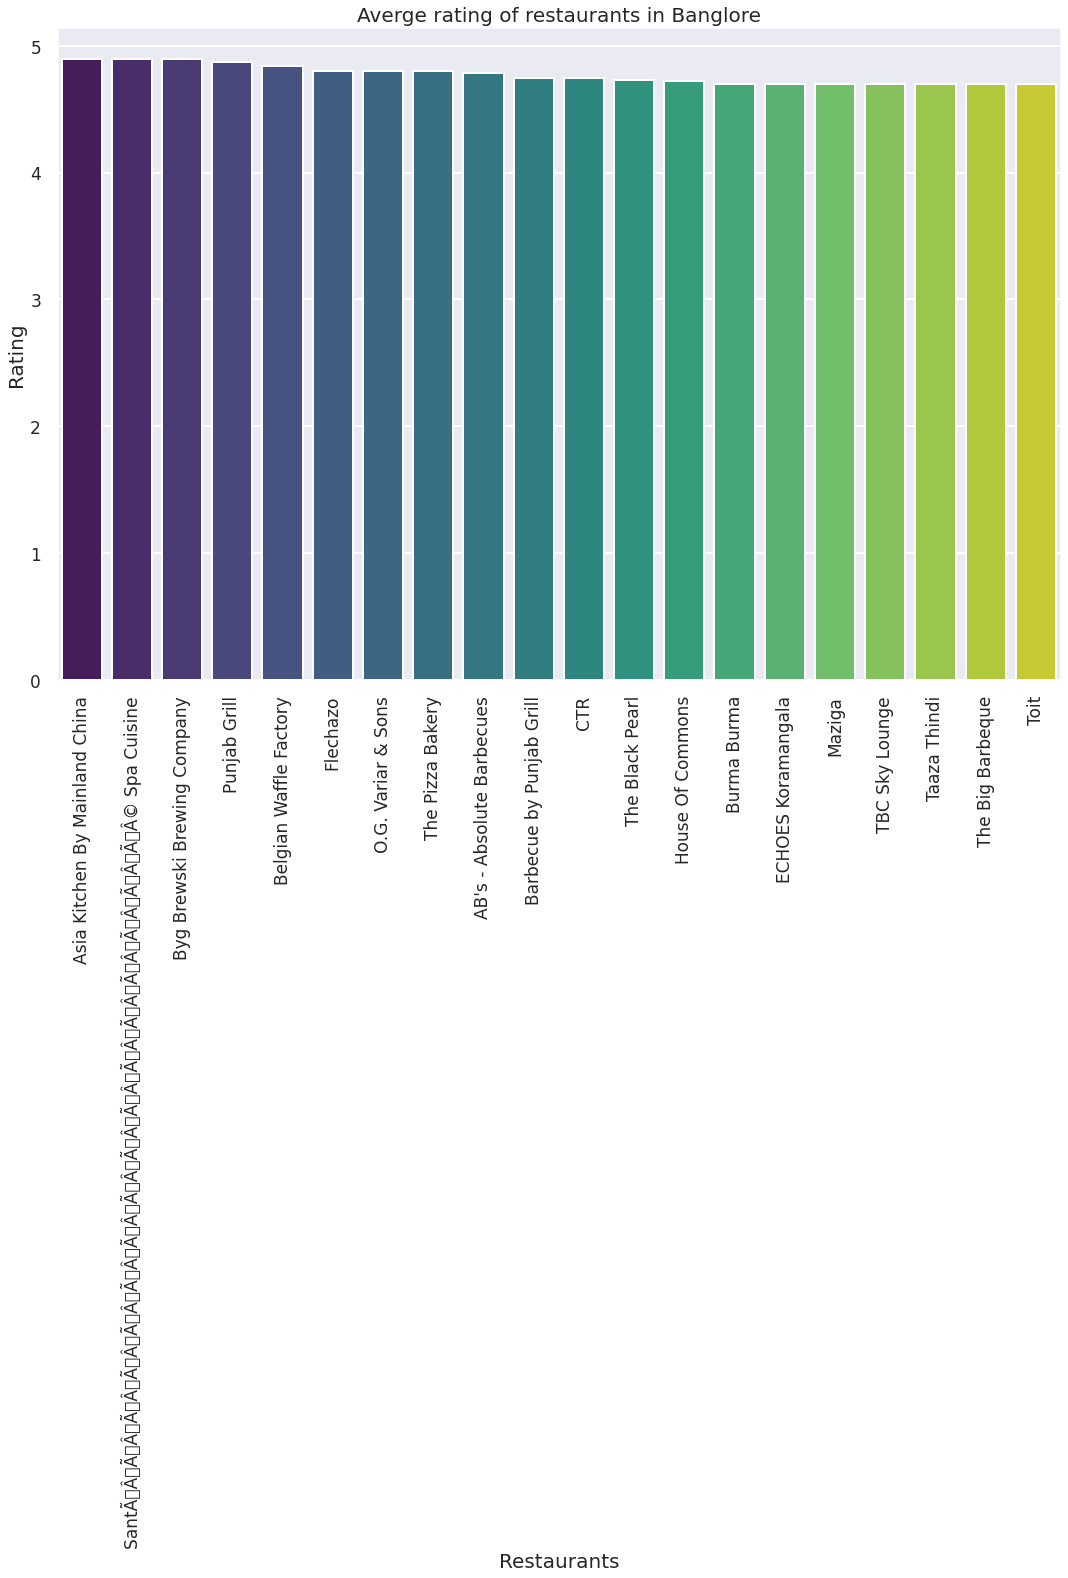

In [34]:
plt.figure(figsize=(18,12))

# set theme
sns.set_theme(style = 'darkgrid', color_codes = True, context = 'poster',
             font = 'sans-serif', font_scale= .6, palette='deep')

# barplot
ax = sns.barplot(x = avg_rating['name'], y = avg_rating['rate'], 
            data = avg_rating, palette='viridis')

_ = plt.xticks(
            rotation = 90,
            horizontalalignment = 'center',
            fontweight = 'light')

# set title
plt.title('Averge rating of restaurants in Banglore', fontsize = 20)

#set x and y label
plt.xlabel('Restaurants', fontsize = 20)
plt.ylabel('Rating', fontsize = 20)

# fontsize of x and y labels
ax.xaxis.set_tick_params(labelsize = 17)
ax.yaxis.set_tick_params(labelsize = 17)

plt.show();

### Distribution of Ratings

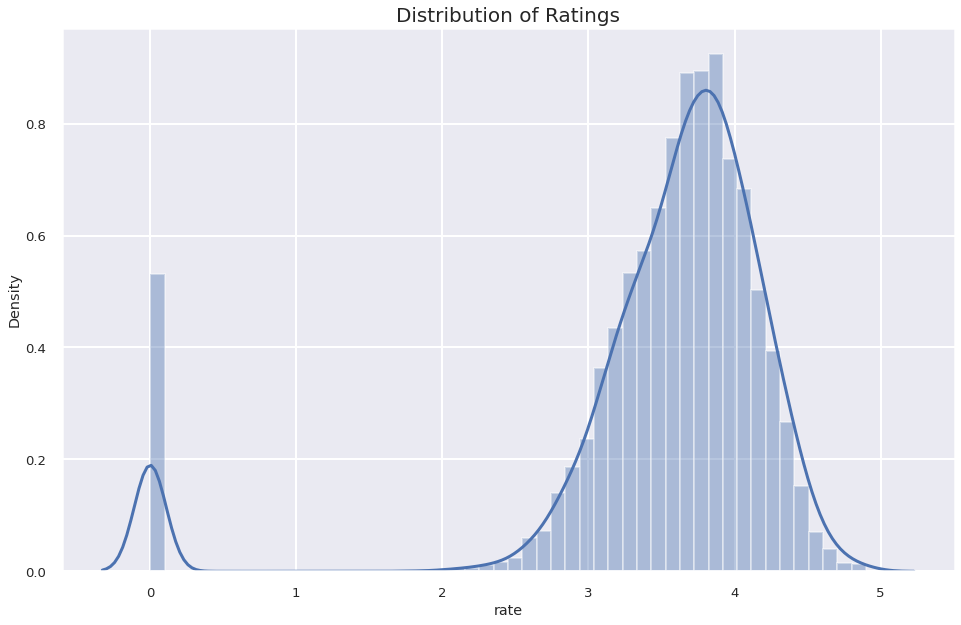

In [35]:
plt.figure(figsize=(16,10))

# set theme
sns.set_theme(style = 'darkgrid', color_codes = True, context = 'poster',
             font = 'sans-serif', font_scale= .6, palette='deep')

sns.distplot(data_df['rate'])

# set title
plt.title('Distribution of Ratings', fontsize = 20)

plt.show();

1. As we can see that the ratings of restaurants are from 2.5 to 4.5.

2. The rating 0 is due to replacement of inappropriate values before doing the EDA.

###  Votes of Restaurants

In [36]:
data_df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        Casual Dining   
1          Yes         No   4.1    787  Banashankari        Casual Dining   
2          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
3           No         No   3.7     88  Banashankari          Quick Bites   
4           No         No   3.8    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [37]:
avg_votes_high = data_df.groupby('name')['votes'].sum().nlargest(20).reset_index()

avg_votes_high

name   votes
0                        Onesta  347520
1                      Truffles  301059
2             Empire Restaurant  229808
3                      Hammered  180602
4               The Black Pearl  172122
5                 Meghana Foods  129557
6               Barbeque Nation  108425
7           Smally's Resto Cafe  102877
8   Byg Brewski Brewing Company   99531
9              Gilly's Restobar   98808
10        Arbor Brewing Company   92362
11             House Of Commons   90573
12                Chutney Chang   89910
13   Fenny's Lounge And Kitchen   89183
14    AB's - Absolute Barbecues   86418
15         Church Street Social   83179
16               Prost Brew Pub   78609
17               The Biere Club   76649
18                       Stoner   75194
19           Koramangala Social   75021

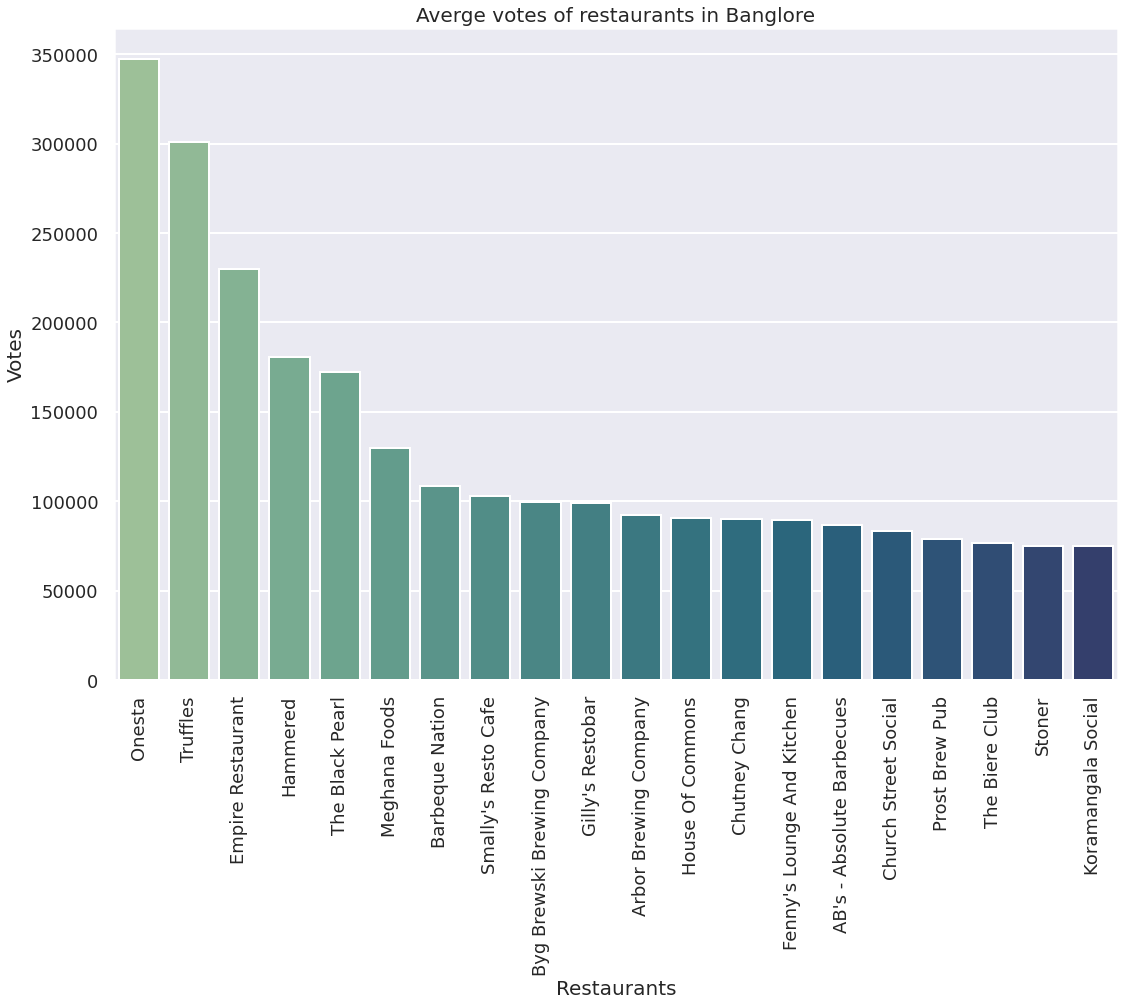

In [38]:
plt.figure(figsize=(18,12))

# set theme
sns.set_theme(style = 'darkgrid', color_codes = True, context = 'poster',
             font = 'sans-serif', font_scale= .6, palette='deep')

ax = sns.barplot(x = avg_votes_high['name'], y = avg_votes_high['votes'], 
            data = avg_votes_high, palette ='crest', saturation=0.75)

_ = plt.xticks(
            rotation = 90,
            horizontalalignment = 'center',
            fontweight = 'light')

# set title
plt.title('Averge votes of restaurants in Banglore', fontsize = 20)

#set x and y label
plt.xlabel('Restaurants', fontsize = 20)
plt.ylabel('Votes', fontsize = 20)

# fontsize of x and y labels
ax.xaxis.set_tick_params(labelsize = 18)
ax.yaxis.set_tick_params(labelsize = 18)

plt.show();

In [39]:
max_votes = pd.DataFrame(data_df.groupby('name')['votes'].max().nlargest(20))

max_votes.T

name   Byg Brewski Brewing Company   Toit  Truffles  \
votes                        16832  14956     14726   

name   AB's - Absolute Barbecues  The Black Pearl  Big Pitcher  Onesta  \
votes                      12121            10550         9300    9085   

name   Arbor Brewing Company  Empire Restaurant  Prost Brew Pub  \
votes                   8419               8304            7871   

name   Church Street Social  Hoot  Barbeque Nation  Meghana Foods  Flechazo  \
votes                  7584  7330             7270           7238      7154   

name   The Hole in the Wall Cafe  Biergarten  Vapour Pub & Brewery  \
votes                       7137        7064                  6998   

name   TBC Sky Lounge  Chili's American Grill & Bar  
votes            6745                          6470

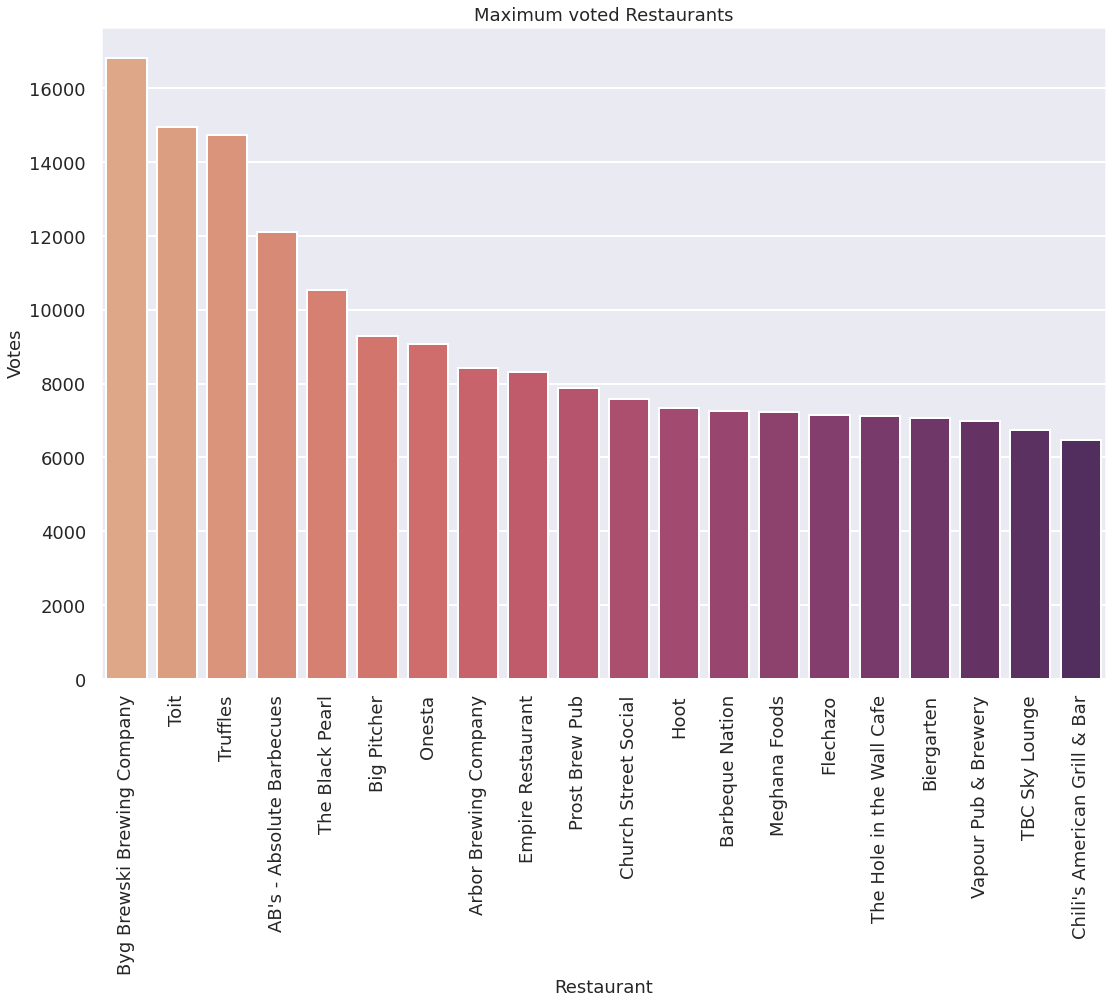

In [40]:
plt.figure(figsize=(18,12))

ax = sns.barplot(x = max_votes.index, y = max_votes['votes'], 
            data = max_votes, palette = 'flare')

_ = plt.xticks(rotation = 90,
              horizontalalignment = 'center',
              fontweight = 'light')

# set title
plt.title('Maximum voted Restaurants', fontsize = 18)

# x label
plt.xlabel('Restaurant', fontsize = 18)
plt.ylabel('Votes', fontsize = 18)

ax.xaxis.set_tick_params(labelsize = 18)
ax.yaxis.set_tick_params(labelsize = 18)

plt.show();

1. As we can see that Byg Brewski Brewing Company, Toit, Truffles etc are the restaurants that are getting the maximum votes from their cutomers.

### Top Restaurant chains in Banglore

In [41]:
data_df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        Casual Dining   
1          Yes         No   4.1    787  Banashankari        Casual Dining   
2          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
3           No         No   3.7     88  Banashankari          Quick Bites   
4           No         No   3.8    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [42]:
chains = data_df['name'].value_counts()[0:20] 

chains

Cafe Coffee Day        89
Onesta                 85
Empire Restaurant      71
Just Bake              68
Kanti Sweets           68
Five Star Chicken      68
Petoo                  64
Baskin Robbins         63
Pizza Hut              62
Polar Bear             61
Domino's Pizza         60
KFC                    60
Sweet Truth            60
Beijing Bites          60
Smoor                  59
Subway                 59
McDonald's             59
Faasos                 57
Burger King            55
Smally's Resto Cafe    54
Name: name, dtype: int64

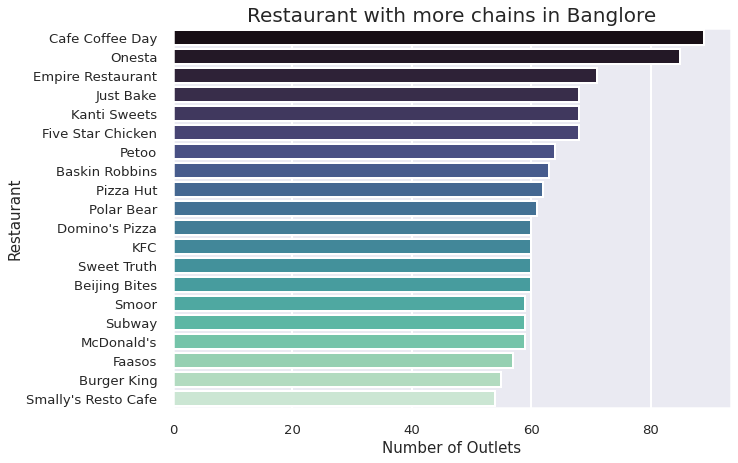

In [43]:
plt.figure(figsize=(10,7))

# set theme
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True, 
            palette = 'deep', font = 'sans-serif', font_scale = 0.6)

# barplot
ax = sns.barplot(y = chains.index, x = chains, palette = 'mako')

# set title
plt.title('Restaurant with more chains in Banglore', fontsize = 20)

# x and y label
plt.xlabel('Number of Outlets', fontsize = 15)
plt.ylabel('Restaurant', fontsize = 15)

plt.show();

1. From the chart we can see that Cafe Coffee Day, Onesta, Empire Restaurant etc are the restaurants with more chains.

### Ratio of Restaurants provide table booking feature

In [44]:
data_df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        Casual Dining   
1          Yes         No   4.1    787  Banashankari        Casual Dining   
2          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
3           No         No   3.7     88  Banashankari          Quick Bites   
4           No         No   3.8    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [45]:
booking = data_df['book_table'].value_counts()

booking

No     37257
Yes     6433
Name: book_table, dtype: int64

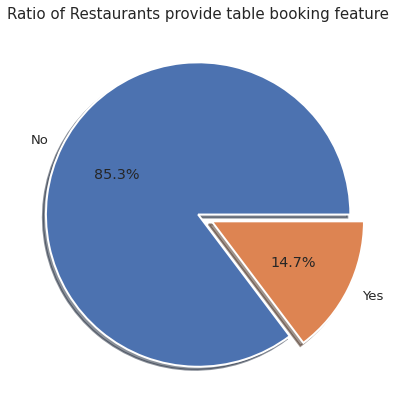

In [46]:
plt.figure(figsize=(10,7))

# pie chart
plt.pie(booking, labels = booking.index, 
        autopct = '%1.1f%%', explode = [0, 0.1], shadow = True)

# set title
plt.title('Ratio of Restaurants provide table booking feature', fontsize = 15)

plt.show();

1. As we can see that 85.3% of the restaurants in Banglore does not provide table booking feature which means they look forward to serve the customers who are availabe at the movement.

###  Restaurants accepting online orders

In [47]:
data_df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        Casual Dining   
1          Yes         No   4.1    787  Banashankari        Casual Dining   
2          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
3           No         No   3.7     88  Banashankari          Quick Bites   
4           No         No   3.8    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [48]:
online = data_df['online_order'].value_counts()
labels = ['accepted', 'not accepted']

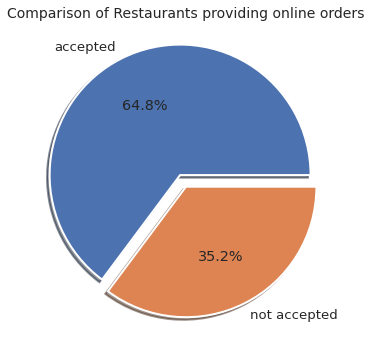

In [49]:
plt.figure(figsize=(10,6))

# set theme
sns.set_theme( style='darkgrid', context='poster', 
              font= 'sans-serif', color_codes= True, font_scale= .6, palette='deep' )

# pie chart
plt.pie(online, labels = labels, 
        autopct='%1.1f%%', shadow = True, explode = [0.1,0])

plt.title('Comparison of Restaurants providing online orders', fontsize = 14)

plt.show();

1. As we can see that 64.8% of restaurants accept online orders.

### Cost vs Rating of restaurants

In [50]:
data_df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        Casual Dining   
1          Yes         No   4.1    787  Banashankari        Casual Dining   
2          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
3           No         No   3.7     88  Banashankari          Quick Bites   
4           No         No   3.8    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [51]:
plt.figure(figsize=(10,7))

px.box(data_df['approx_cost(for two people)'], title = 'Cost for 2 people in Restaurant' )

<Figure size 720x504 with 0 Axes>

In [52]:
print('The minimum cost for 2 people is :', data_df['approx_cost(for two people)'].min())
print('The maximum cost for 2 people is :', data_df['approx_cost(for two people)'].max())
print('The average cost for 2 people is :', round(data_df['approx_cost(for two people)'].mean(),2))

The minimum cost for 2 people is : 40
The maximum cost for 2 people is : 6000
The average cost for 2 people is : 594.27


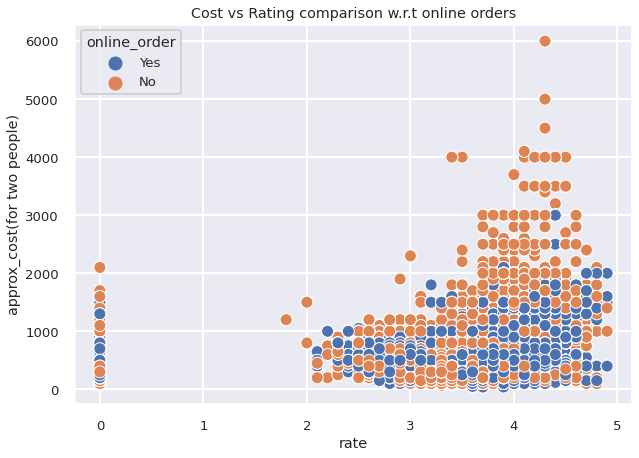

In [53]:
plt.figure(figsize=(10,7))

# set theme
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True, 
            palette = 'deep', font = 'sans-serif', font_scale = 0.6)


sns.scatterplot(x = data_df['rate'], y = data_df['approx_cost(for two people)'] ,
                hue = 'online_order', data = data_df)

# set title
plt.title('Cost vs Rating comparison w.r.t online orders')

plt.show();

1. As we can see that most of the high rated restaurants are accepting online orders.

2. And also some restaurants who dont provide online order tend to charge more as we some outliers in the data.

### Top expensive restaurants with approx cost for 2 people

In [54]:
data = data_df[['name','approx_cost(for two people)']]
data.set_index('name', inplace = True)

In [55]:
data = data.nlargest(30, columns = 'approx_cost(for two people)')
data

approx_cost(for two people)
name                                                               
Le Cirque Signature - The Leela Palace                         6000
Le Cirque Signature - The Leela Palace                         6000
Royal Afghan - ITC Windsor                                     5000
Malties - Radisson Blu                                         4500
Malties - Radisson Blu                                         4500
La Brasserie - Le Meridien                                     4100
La Brasserie - Le Meridien                                     4100
La Brasserie - Le Meridien                                     4100
La Brasserie - Le Meridien                                     4100
Alba - JW Marriott Bengaluru                                   4000
Edo Restaurant & Bar - ITC Gardenia                            4000
Riwaz - The Ritz-Carlton                                       4000
Grill 99 - The Ritz-Carlton                                    4000
Riwaz - The Ritz-Carlton                                       4000
Alba - JW Marriott Bengaluru                                   4000
Edo Restaurant & Bar - ITC Gardenia                            4000
Riwaz - The Ritz-Carlton                                       4000
Grill 99 - The Ritz-Carlton                                    4000
Masala Klub - The Taj West End                                 4000
Riwaz - The Ritz-Carlton                                       4000
Jamavar - The Leela Palace                                     4000
Edo Restaurant & Bar - ITC Gardenia                            4000
Riwaz - The Ritz-Carlton                                       4000
Masala Klub - The Taj West End                                 4000
Grill 99 - The Ritz-Carlton                                    4000
Riwaz - The Ritz-Carlton                                       4000
Dakshin - ITC Windsor                                          4000
Dum Pukht Jolly Nabobs - ITC Windsor                           4000
Alba - JW Marriott Bengaluru                                   4000
Edo Restaurant & Bar - ITC Gardenia                            4000

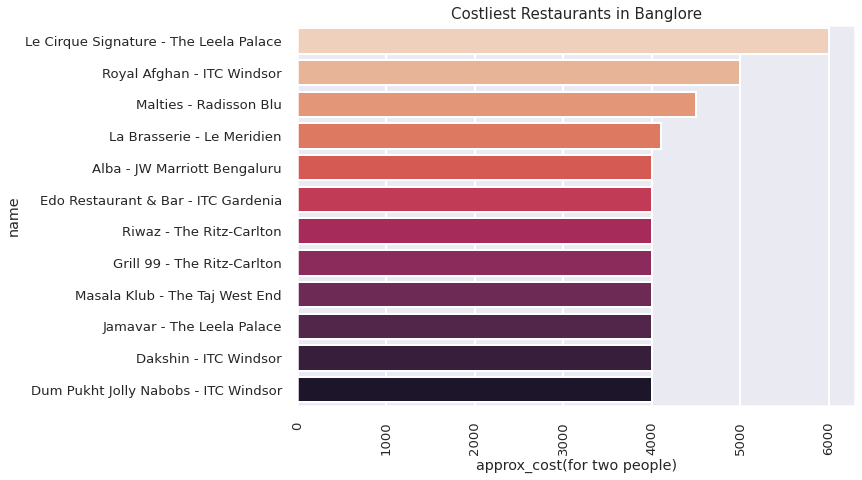

In [56]:
plt.figure(figsize=(10,7))

# set theme
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
             font = 'sans-serif', font_scale = 0.6)
# bar plot
sns.barplot(y = data.index, x = data['approx_cost(for two people)'], 
            data = data, palette = 'rocket_r')

_ = plt.xticks(rotation = 90,
              horizontalalignment = 'center',
              fontweight = 'light')

# set title
plt.title('Costliest Restaurants in Banglore', fontsize = 15)

plt.show();

In [57]:
data_df[data_df['approx_cost(for two people)']==6000][['name','cuisines','dish_liked']]

name         cuisines  \
19139  Le Cirque Signature - The Leela Palace  French, Italian   
45618  Le Cirque Signature - The Leela Palace  French, Italian   

                                              dish_liked  
19139  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...  
45618  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...

1. From the graph we can see that __Le Cirque Signature - The Leela Palace__ is the costliest restaurant in Banglore which is __6000 rupees__ and cannot be afforded by all people.

### Cheapest Restaurants in Banglore

In [58]:
data = data_df[['name','approx_cost(for two people)']]
data.set_index('name', inplace = True)

In [59]:
data = data.nsmallest(30, columns = 'approx_cost(for two people)')

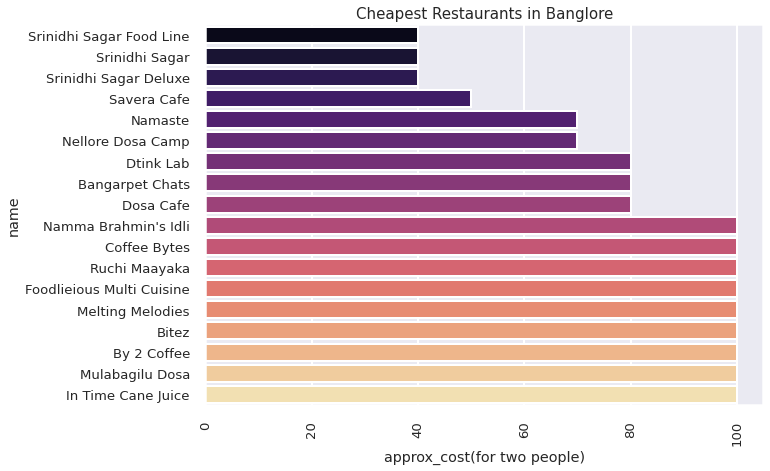

In [60]:
plt.figure(figsize=(10,7))

# set theme
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
             font = 'sans-serif', font_scale = 0.6)
# bar plot
sns.barplot(y = data.index, x = data['approx_cost(for two people)'], 
            data = data, palette = 'magma')

_ = plt.xticks(rotation = 90,
              horizontalalignment = 'center',
              fontweight = 'light')

# set title
plt.title('Cheapest Restaurants in Banglore', fontsize = 15)

plt.show();

1. From the graph we can see that the for cheaper restaurant we only require a less than __100 rupees__ which in most case can be used by people ehoe tend to live within their budjet.

### Types of Restaurants

In [61]:
data_df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        Casual Dining   
1          Yes         No   4.1    787  Banashankari        Casual Dining   
2          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
3           No         No   3.7     88  Banashankari          Quick Bites   
4           No         No   3.8    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [62]:
type_rest = data_df['rest_type'].value_counts().nlargest(20)

type_rest

Quick Bites                   15055
Casual Dining                  9926
Cafe                           3502
Dessert Parlor                 1926
Delivery                       1789
Takeaway, Delivery             1464
Casual Dining, Bar             1123
Bakery                          781
Beverage Shop                   706
Bar                             657
Food Court                      527
Bar, Casual Dining              410
Lounge                          397
Pub                             356
Sweet Shop                      353
Fine Dining                     343
Casual Dining, Cafe             311
Pub, Casual Dining              255
Beverage Shop, Quick Bites      243
Bakery, Quick Bites             231
Name: rest_type, dtype: int64

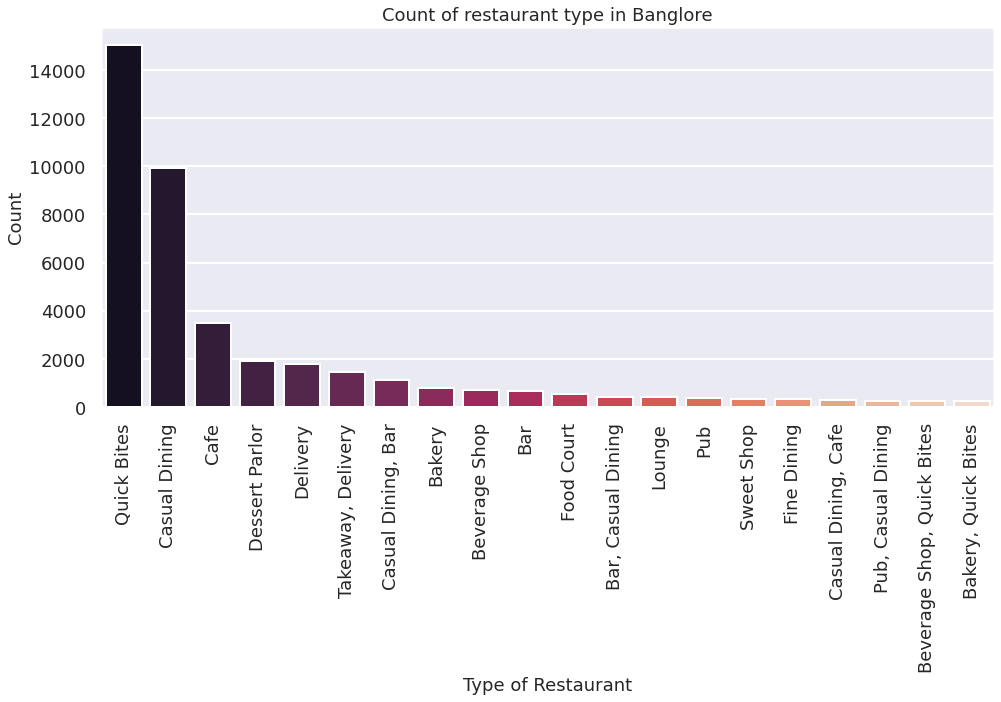

In [63]:
plt.figure(figsize = (16,7))

# set theme
sns.set_theme( style='darkgrid', context='poster', 
              font= 'sans-serif', color_codes= True, font_scale= .6, palette='deep' )

# bar plot
ax = sns.barplot(x = type_rest.index, y = type_rest, palette = 'rocket')

_ = plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light' )

# set title
plt.title('Count of restaurant type in Banglore', fontsize = 18)

# x and y label
plt.xlabel('Type of Restaurant', fontsize = 18)
plt.ylabel('Count', fontsize = 18)

ax.xaxis.set_tick_params(labelsize = 18)
ax.yaxis.set_tick_params(labelsize = 18)

plt.show();

1. As we can see that Quick Bites comes out as top out of other restaurants.

2. The reason is that after all, Banglore is a tech city and people leading modern life prefer to go to q

### Restaurant count at different locations in Banglore

In [64]:
data_df.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka                    [Prashanth Naati Corner, Cheta's Kitchen]
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 92, dtype: object

In [65]:
locations = []
restaurants = []

for key,location_df in data_df.groupby('location'):
    locations.append(key)
    restaurants.append(len(location_df['name'].unique()))

In [66]:
total_df = pd.DataFrame(zip(locations,restaurants))
total_df.columns = ['Location', 'Total_Count']
total_df.set_index('Location', inplace = True)
total_df = total_df.sort_values(by = 'Total_Count', ascending = False)

In [67]:
data = total_df.head(15)
data

Total_Count
Location                          
Whitefield                     632
BTM                            581
HSR                            550
Marathahalli                   523
Electronic City                517
Indiranagar                    463
JP Nagar                       400
Bannerghatta Road              361
Jayanagar                      311
Bellandur                      284
Sarjapur Road                  271
Koramangala 5th Block          249
Banashankari                   238
New BEL Road                   226
Malleshwaram                   207

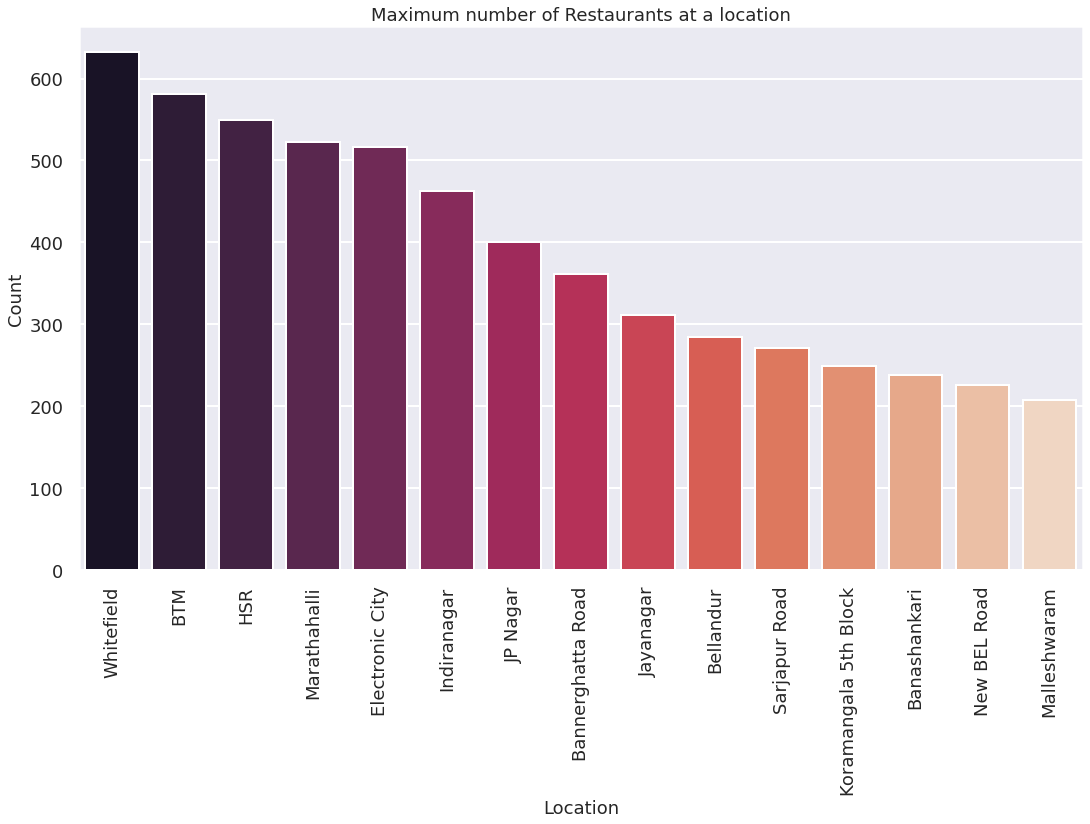

In [68]:
plt.figure(figsize=(18,10))

# set theme
sns.set_theme(style = 'darkgrid', color_codes = True, context = 'poster',
             font = 'sans-serif', font_scale = 0.6, palette = 'deep')

# barplot 
ax = sns.barplot(x = data.index, y = data['Total_Count'], 
            data = data ,palette = 'rocket')

_ = plt.xticks(rotation = 90,
              horizontalalignment = 'center',
              fontweight = 'light')

# set title
plt.title('Maximum number of Restaurants at a location', fontsize = 18)

# y label
plt.xlabel('Location', fontsize = 18)
plt.ylabel('Count', fontsize = 18)

# x and y parameter size
ax.xaxis.set_tick_params(labelsize = 18)
ax.yaxis.set_tick_params(labelsize = 18)

plt.show();


### Restaurant variety in Banglore

In [69]:
data_df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        Casual Dining   
1          Yes         No   4.1    787  Banashankari        Casual Dining   
2          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
3           No         No   3.7     88  Banashankari          Quick Bites   
4           No         No   3.8    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [70]:
cuisines = pd.DataFrame(data_df['cuisines'].value_counts()[:15])

cuisines

cuisines
North Indian                             2254
North Indian, Chinese                    2055
South Indian                             1318
Bakery, Desserts                          642
Biryani                                   641
Cafe                                      631
South Indian, North Indian, Chinese       601
Fast Food                                 576
Desserts                                  566
Chinese                                   449
Bakery                                    432
Ice Cream, Desserts                       389
Chinese, North Indian                     352
Mithai, Street Food                       332
North Indian, Chinese, Biryani            282

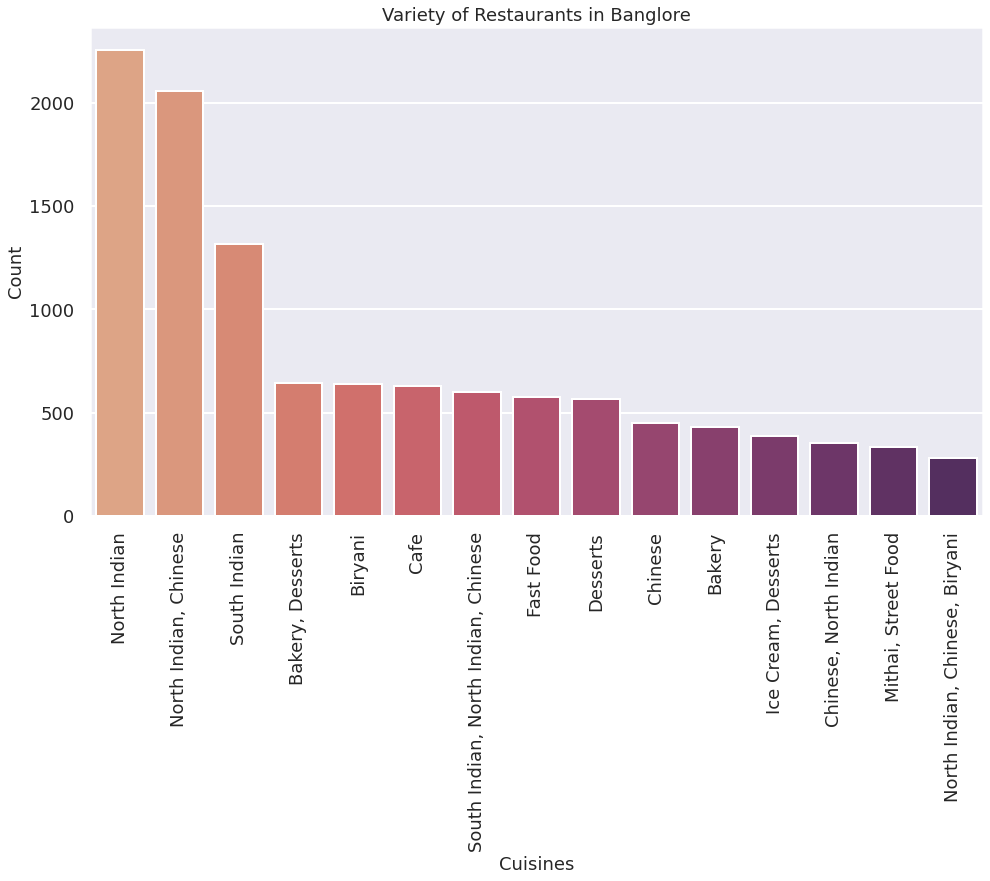

In [71]:
plt.figure(figsize=(16,9))

# set theme
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
             font = 'sans-serif', font_scale = 0.6 )

# barplot
ax = sns.barplot(x = cuisines.index, y = cuisines['cuisines'], 
            data = cuisines, palette = 'flare')

_ = plt.xticks(rotation = 90,
              horizontalalignment = 'center',
              fontweight = 'light')

# set title
plt.title('Variety of Restaurants in Banglore', fontsize = 18)

# x and y label
plt.xlabel('Cuisines', fontsize = 18)
plt.ylabel('Count', fontsize = 18)

ax.xaxis.set_tick_params(labelsize = 18)
ax.yaxis.set_tick_params(labelsize = 18)

plt.show();

1. As we can see that North Indian has a higher count, from we can see Banglore is influenced more by North Indian food more than South Indian. 

### Do online orders influence the voting of restaurants

In [72]:
data_df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        Casual Dining   
1          Yes         No   4.1    787  Banashankari        Casual Dining   
2          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
3           No         No   3.7     88  Banashankari          Quick Bites   
4           No         No   3.8    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [73]:
plt.figure(figsize=(15,6))
px.box(x = 'online_order', y = 'votes', data_frame = data_df)

<Figure size 1080x432 with 0 Axes>

1. From the graph we can see that the restaurants that provide online order recieve more votes compared to the restaurant that dont provide online order.

2. The voting option in availabe in the zomato app which makes it easier for the cutomers to vote.

### Is there any difference b/w price of restaurants accepting and not accepting online orders?

In [74]:
data_df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        Casual Dining   
1          Yes         No   4.1    787  Banashankari        Casual Dining   
2          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
3           No         No   3.7     88  Banashankari          Quick Bites   
4           No         No   3.8    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [75]:
px.box(data_df, x = 'online_order', y = 'approx_cost(for two people)', 
       title = 'Price comparison for restaurant on the basis online order')

1. From the graph we can see that the restaurant that provide online order are much affordalbe than the restaurant that dont provide online order. 

### Finding Restaurants within budjet

In [76]:
def res_within_budjet(location, restaurant):
    budjet = data_df[(data_df['approx_cost(for two people)'] <= 500) & (data_df['rate'] > 4) &
                      (data_df['rest_type'] == restaurant) & (data_df['location'] == location)]
    return (budjet['name'].unique())

In [77]:
res_within_budjet('BTM',"Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       'Hungry Lee', "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'],
      dtype=object)

### Areas with higher number of restaurant

In [78]:
locations = pd.DataFrame(data_df['location'].value_counts().nlargest(15))

locations.rename(columns = {'location':'Count'}, inplace = True)

In [79]:
locations.head()

Count
BTM                     4237
Koramangala 5th Block   2358
HSR                     2113
Indiranagar             1892
JP Nagar                1849

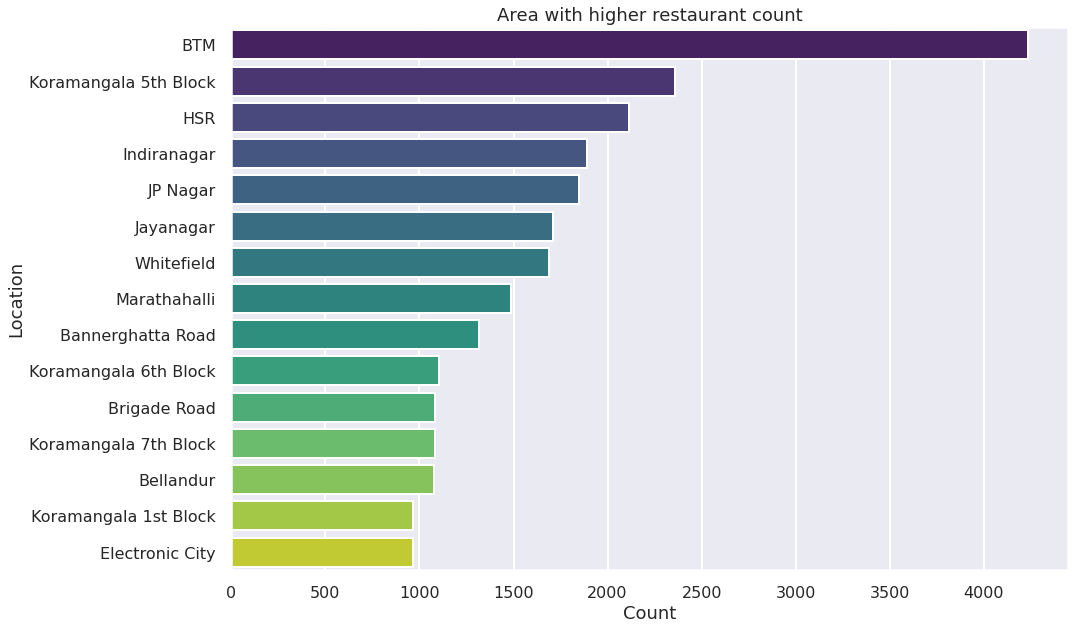

In [80]:
plt.figure(figsize=(15,10))

# set theme
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
             font = 'sans-serif', font_scale = 0.6)

# barplot
ax = sns.barplot(y = locations.index, x = locations['Count'], 
            data = locations, palette = 'viridis')

# set title
plt.title('Area with higher restaurant count', fontsize = 18)

# x and y label
plt.xlabel('Count', fontsize = 18)
plt.ylabel('Location', fontsize = 18)

# axis parameter
ax.xaxis.set_tick_params(labelsize = 16)
ax.yaxis.set_tick_params(labelsize = 16)


1. We can see that BTM, Koramangala 5th Block, HSR are the areas with higher restaurant count.

### Geographical Analysis

In [81]:
data_df.shape

(43690, 16)

In [82]:
# new dataframe with Name and locations

locations_df = pd.DataFrame({'Name':data_df['location'].unique()})
locations_df['New_Name'] = 'Banglore ' + locations_df['Name']
locations_df.head()

Name                     New_Name
0        Banashankari        Banglore Banashankari
1        Basavanagudi        Banglore Basavanagudi
2         Mysore Road         Banglore Mysore Road
3           Jayanagar           Banglore Jayanagar
4  Kumaraswamy Layout  Banglore Kumaraswamy Layout

In [83]:
# getting the latitude and longitude of the restaurants

lat_lon = []
geolocator = Nominatim(user_agent = 'app')
for location in locations_df['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo = (location.latitude, location.longitude)
        lat_lon.append(geo)

In [84]:
# updating the dataframe with the latitude and longitude

locations_df['Geo_location'] = lat_lon
locations_df.head()

Name                     New_Name  \
0        Banashankari        Banglore Banashankari   
1        Basavanagudi        Banglore Basavanagudi   
2         Mysore Road         Banglore Mysore Road   
3           Jayanagar           Banglore Jayanagar   
4  Kumaraswamy Layout  Banglore Kumaraswamy Layout   

                       Geo_location  
0          (15.8876779, 75.7046777)  
1          (12.9417261, 77.5755021)  
2          (12.3872141, 76.6669626)  
3  (27.64392675, 83.05280519687284)  
4          (12.9081487, 77.5553179)

In [85]:
locations_df[locations_df['Name']=="BTM"]

Name      New_Name                        Geo_location
12  BTM  Banglore BTM  (45.95485055, -112.49659530324134)

In [86]:
rest_location = pd.DataFrame(data_df['location'].value_counts().reset_index())

In [87]:
rest_location.rename(columns = {'index':'Name',
                               'location':'Count'}, inplace = True)

In [88]:
rest_location.head()

Name  Count
0                    BTM   4237
1  Koramangala 5th Block   2358
2                    HSR   2113
3            Indiranagar   1892
4               JP Nagar   1849

In [89]:
# combining rest_location and locations_df

restaurant_location = rest_location.merge(locations_df, on = 'Name', how = 'left').dropna()
restaurant_location.head()

Name  Count                        New_Name  \
0                    BTM   4237                    Banglore BTM   
1  Koramangala 5th Block   2358  Banglore Koramangala 5th Block   
2                    HSR   2113                    Banglore HSR   
3            Indiranagar   1892            Banglore Indiranagar   
4               JP Nagar   1849               Banglore JP Nagar   

                         Geo_location  
0  (45.95485055, -112.49659530324134)  
1             (12.9343774, 77.628415)  
2                (18.1475, 41.538889)  
3            (12.9732913, 77.6404672)  
4            (12.2655944, 76.6465404)

In [90]:
# checking na values

restaurant_location.isna().sum()

Name            0
Count           0
New_Name        0
Geo_location    0
dtype: int64

In [91]:
# unzipping Geo_location to latitude and longitude

lat, lon = zip(*np.array(restaurant_location['Geo_location']))

In [92]:
# updating the datafrome wit latitude and longitude

restaurant_location['Latitude'] = lat
restaurant_location['Longitude'] = lon

In [93]:
restaurant_location.head()

Name  Count                        New_Name  \
0                    BTM   4237                    Banglore BTM   
1  Koramangala 5th Block   2358  Banglore Koramangala 5th Block   
2                    HSR   2113                    Banglore HSR   
3            Indiranagar   1892            Banglore Indiranagar   
4               JP Nagar   1849               Banglore JP Nagar   

                         Geo_location   Latitude   Longitude  
0  (45.95485055, -112.49659530324134)  45.954851 -112.496595  
1             (12.9343774, 77.628415)  12.934377   77.628415  
2                (18.1475, 41.538889)  18.147500   41.538889  
3            (12.9732913, 77.6404672)  12.973291   77.640467  
4            (12.2655944, 76.6465404)  12.265594   76.646540

In [94]:
# generating basemap

def generate_basemap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location = default_location, zoom_start = default_zoom_start)
    return base_map

In [95]:
base_map = generate_basemap()

In [96]:
base_map

In [97]:
HeatMap(restaurant_location[['Latitude','Longitude','Count']].values.tolist(), radius = 15).add_to(base_map)

In [98]:
base_map

1. As we can see that most of the restaurant are located in the central area of Banglore, which is an ideal location for restaurants to earn more.

2. As we move away from central area the count id decreasing.

3. There are also some restaurant on the highway.

### Heatmap of North Indian Cuisines

In [99]:
data_df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [100]:
north_indian = data_df[data_df['cuisines'] == 'North Indian']
north_indian.head()

url  \
5   https://www.zomato.com/bangalore/timepass-dinn...   
50  https://www.zomato.com/bangalore/petoo-banasha...   
72  https://www.zomato.com/bangalore/spicy-tandoor...   
87  https://www.zomato.com/bangalore/krishna-sagar...   
94  https://www.zomato.com/bangalore/nandhini-delu...   

                                              address             name  \
5   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...  Timepass Dinner   
50  276, Ground Floor, 100 Feet Outer Ring Road, B...            Petoo   
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...    Spicy Tandoor   
87  38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...    Krishna Sagar   
94  304, Opposite Apollo Public School, 100 Feet R...  Nandhini Deluxe   

   online_order book_table  rate  votes      location      rest_type  \
5           Yes         No   3.8    286  Basavanagudi  Casual Dining   
50           No         No   3.7     21  Banashankari    Quick Bites   
72           No         No   0.0      0  Banashankari    Quick Bites   
87           No         No   3.5     31  Banashankari    Quick Bites   
94           No         No   2.6    283  Banashankari  Casual Dining   

                                           dish_liked      cuisines  \
5   Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...  North Indian   
50                                                NaN  North Indian   
72                                                NaN  North Indian   
87                                                NaN  North Indian   
94  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...  North Indian   

    approx_cost(for two people)  \
5                           600   
50                          450   
72                          150   
87                          200   
94                          600   

                                         reviews_list menu_item  \
5   [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
50  [('Rated 2.0', 'RATED\n  This is a neatly made...        []   
72  [('Rated 4.0', 'RATED\n  cost for chicken roll...        []   
87  [('Rated 1.0', 'RATED\n  Worst experience with...        []   
94  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   

   listed_in(type) listed_in(city)  
5           Buffet    Banashankari  
50        Delivery    Banashankari  
72        Delivery    Banashankari  
87        Delivery    Banashankari  
94        Delivery    Banashankari

In [101]:
north_india_count = north_indian.groupby(['location'], as_index = False)['url'].agg('count')
north_india_count.columns = ['Name', 'Count']
north_india_count.head()

Name  Count
0                BTM    262
1       Banashankari     35
2          Banaswadi      9
3  Bannerghatta Road     60
4       Basavanagudi     17

In [102]:
restaurant_location.head()

Name  Count                        New_Name  \
0                    BTM   4237                    Banglore BTM   
1  Koramangala 5th Block   2358  Banglore Koramangala 5th Block   
2                    HSR   2113                    Banglore HSR   
3            Indiranagar   1892            Banglore Indiranagar   
4               JP Nagar   1849               Banglore JP Nagar   

                         Geo_location   Latitude   Longitude  
0  (45.95485055, -112.49659530324134)  45.954851 -112.496595  
1             (12.9343774, 77.628415)  12.934377   77.628415  
2                (18.1475, 41.538889)  18.147500   41.538889  
3            (12.9732913, 77.6404672)  12.973291   77.640467  
4            (12.2655944, 76.6465404)  12.265594   76.646540

In [103]:
north_indian_rest = north_india_count.merge(restaurant_location, on = 'Name', how = 'left').dropna()
north_indian_rest.drop(labels = ['Count_y', 'Geo_location'], axis = 1, inplace = True)

In [104]:
north_indian_rest.shape

(63, 5)

In [105]:
north_indian_rest.head()

Name  Count_x                    New_Name   Latitude  \
0                BTM      262                Banglore BTM  45.954851   
1       Banashankari       35       Banglore Banashankari  15.887678   
2          Banaswadi        9          Banglore Banaswadi  13.014162   
3  Bannerghatta Road       60  Banglore Bannerghatta Road  12.928862   
4       Basavanagudi       17       Banglore Basavanagudi  12.941726   

    Longitude  
0 -112.496595  
1   75.704678  
2   77.651854  
3   77.600598  
4   77.575502

In [106]:
north_indian_rest.shape

(63, 5)

In [107]:
basemap = generate_basemap()

HeatMap(north_indian_rest[['Latitude', 'Longitude', 'Count_x']].values.tolist(), radius = 15).add_to(basemap) 

basemap

### How about South Indian Restaurant

In [108]:
south_india = data_df[data_df['cuisines'] == 'South Indian']
south_india.head()

url  \
39   https://www.zomato.com/bangalore/maruthi-davan...   
41   https://www.zomato.com/bangalore/havyaka-mess-...   
66   https://www.zomato.com/bangalore/namma-brahmin...   
76   https://www.zomato.com/bangalore/sri-guru-kott...   
100  https://www.zomato.com/bangalore/kidambis-kitc...   

                                               address  \
39   556/A, Water Tank Road, 3rd Stage, Banashankar...   
41   Opp Vinayaka hospital, Near Seetha Circle , 80...   
66   30th Cross, 8th Main, Near Jain Temple, 4th Bl...   
76   49/1, Subbaraoshetty Road, Netkallappa Circle,...   
100  2465, 3rd Floor, Opposite BDA Complex, 24th Cr...   

                                            name online_order book_table  \
39                  Maruthi Davangere Benne Dosa          Yes         No   
41                                  Havyaka Mess           No         No   
66                          Namma Brahmin's Idli          Yes         No   
76   Sri Guru Kottureshwara Davangere Benne Dosa          Yes         No   
100                            Kidambi's Kitchen           No         No   

     rate  votes      location    rest_type  \
39    4.0     17  Banashankari  Quick Bites   
41    3.9     28  Banashankari         Mess   
66    3.6     34     Jayanagar  Quick Bites   
76    4.1    558  Basavanagudi  Quick Bites   
100   3.5     52  Banashankari  Quick Bites   

                                            dish_liked      cuisines  \
39                                                 NaN  South Indian   
41                                                 NaN  South Indian   
66                                                 NaN  South Indian   
76   Benne Dosa, Mirchi Bajji, Filter Coffee, Poha,...  South Indian   
100                                   Rooftop Ambience  South Indian   

     approx_cost(for two people)  \
39                           150   
41                           300   
66                           100   
76                           150   
100                          300   

                                          reviews_list  \
39   [('Rated 5.0', "RATED\n  This restaurant serve...   
41   [('Rated 4.0', 'RATED\n  Food is good.very hom...   
66   [('Rated 4.0', 'RATED\n  Quite a cosy & small ...   
76   [('Rated 4.0', 'RATED\n  My go-to benne dosa p...   
100  [('Rated 4.0', 'RATED\n  If you are looking fo...   

                                             menu_item listed_in(type)  \
39   ['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...        Delivery   
41                                                  []        Delivery   
66   ['Tatte Idli', 'Butter Idli', 'Butter Pudi Idl...        Delivery   
76   ['Benne Dose', 'Benne Kali Dose', 'Open Dose',...        Delivery   
100                                                 []        Delivery   

    listed_in(city)  
39     Banashankari  
41     Banashankari  
66     Banashankari  
76     Banashankari  
100    Banashankari

In [109]:
south_indian_count = south_india.groupby(['location'], as_index = False)['url'].agg('count')
south_indian_count.columns = ['Name', 'Count']
south_indian_count.head()

Name  Count
0                BTM     66
1       Banashankari     60
2          Banaswadi     27
3  Bannerghatta Road     24
4       Basavanagudi     86

In [110]:
south_indian_rest = south_indian_count.merge(restaurant_location, on = 'Name', how = 'left').dropna()
south_indian_rest.drop(labels = ['Count_y', 'Geo_location'], axis = 1, inplace = True)
south_indian_rest.head()

Name  Count_x                    New_Name   Latitude  \
0                BTM       66                Banglore BTM  45.954851   
1       Banashankari       60       Banglore Banashankari  15.887678   
2          Banaswadi       27          Banglore Banaswadi  13.014162   
3  Bannerghatta Road       24  Banglore Bannerghatta Road  12.928862   
4       Basavanagudi       86       Banglore Basavanagudi  12.941726   

    Longitude  
0 -112.496595  
1   75.704678  
2   77.651854  
3   77.600598  
4   77.575502

In [111]:
basemap = generate_basemap()
HeatMap(south_indian_rest[['Latitude', 'Longitude', 'Count_x']].values.tolist(), radius = 20).add_to(basemap)
basemap

1. As we can see that the frequency of South Indian restaurants is more than North Indian restaurants. 

### Wordcloud analysis for dishes liked

In [112]:
dishes_liked_df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        Casual Dining   
1          Yes         No   4.1    787  Banashankari        Casual Dining   
2          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
3           No         No   3.7     88  Banashankari          Quick Bites   
4           No         No   3.8    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  \
0          Buffet    Banashankari   
1          Buffet    Banashankari   
2          Buffet    Banashankari   
3          Buffet    Banashankari   
4          Buffet    Banashankari   

                                  updated_dish_liked  
0  [Pasta, Lunch Buffet, Masala Papad, Paneer Laj...  
1  [Momos, Lunch Buffet, Chocolate Nirvana, Thai ...  
2  [Churros, Cannelloni, Minestrone Soup, Hot Cho...  
3                                      [Masala Dosa]  
4                              [Panipuri, Gol Gappe]

In [118]:
for word in dishes_liked_df['dish_liked']:
    dishes += ''.join(word)    

In [119]:
dishes_liked_df['dish_liked'].isna().sum()

0

In [120]:
dishes

'Cocktails, Pizza, ButtermilkPasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn SoupMomos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken BiryaniChurros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme PizzaMasala DosaPanipuri, Gol GappeOnion Rings, Pasta, Kadhai Paneer, Salads, Salad, Roti, Jeera RiceFarmhouse Pizza, Chocolate Banana, Virgin Mojito, Pasta, Paneer Tikka, Lime Soda, Prawn PizzaPizza, Mocktails, Coffee, Nachos, Salad, Pasta, SandwichesWaffles, Pasta, Coleslaw Sandwich, Choco Waffle, Tacos, Momos, Cheese NachosWaffles, Pasta, Crispy Chicken, Honey Chilli Chicken, Sandwich, Coffee, CrepeMocktails, Peri Fries, Lasagne, Pizza, Chicken Bbq Wings, Virgin Mojito, NachosCoffee, Spaghetti, Pancakes, Nachos, Pasta, Sandwich, Garlic BreadSandwich, Omelette, Ice Tea, Virgin Mojito, Hot Chocolate, Pasta Arrabiata, Hazelnut CappuccinoChurros, Cannelloni, Minestrone Soup, Hot 

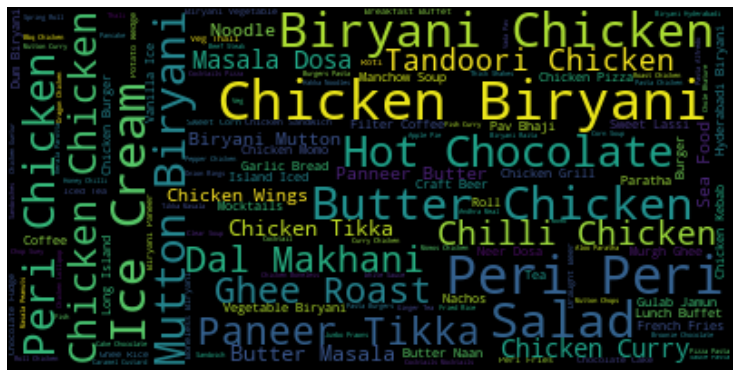

In [121]:
stopwords = set(STOPWORDS)

text = dishes

plt.rcParams['figure.figsize'] = (13,13)

wordcloud = WordCloud(max_font_size=30, max_words=200, 
                      background_color='black', ).generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

### Wordcloud for top 9 restaurants

In [122]:
rest_type = list(data_df['rest_type'].value_counts()[:9].index)
rest_type

['Quick Bites',
 'Casual Dining',
 'Cafe',
 'Dessert Parlor',
 'Delivery',
 'Takeaway, Delivery',
 'Casual Dining, Bar',
 'Bakery',
 'Beverage Shop']

In [123]:
data_df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                          0
dish_liked                     20216
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [124]:
data_df.dropna(subset = ['dish_liked'], inplace =True)

In [125]:
def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i, restaurant in enumerate(rest):
        plt.subplot(3,3,i+1)
        dishes = ''
        data = data_df[data_df['rest_type'] == restaurant] 
        
        for word in data['dish_liked']:
            words = word.split(', ')
            
            # Coverting each char into lower case
            for i in range(len(words)):
                words[i] = words[i].lower()
            dishes = dishes+' '.join(words)+' '

        wordcloud = WordCloud(max_font_size = None, stopwords = stopwords, collocations = False, background_color = 'white',width=1500, height=1500).generate(dishes)
        plt.imshow(wordcloud)
        plt.title(restaurant)
        plt.axis('off')

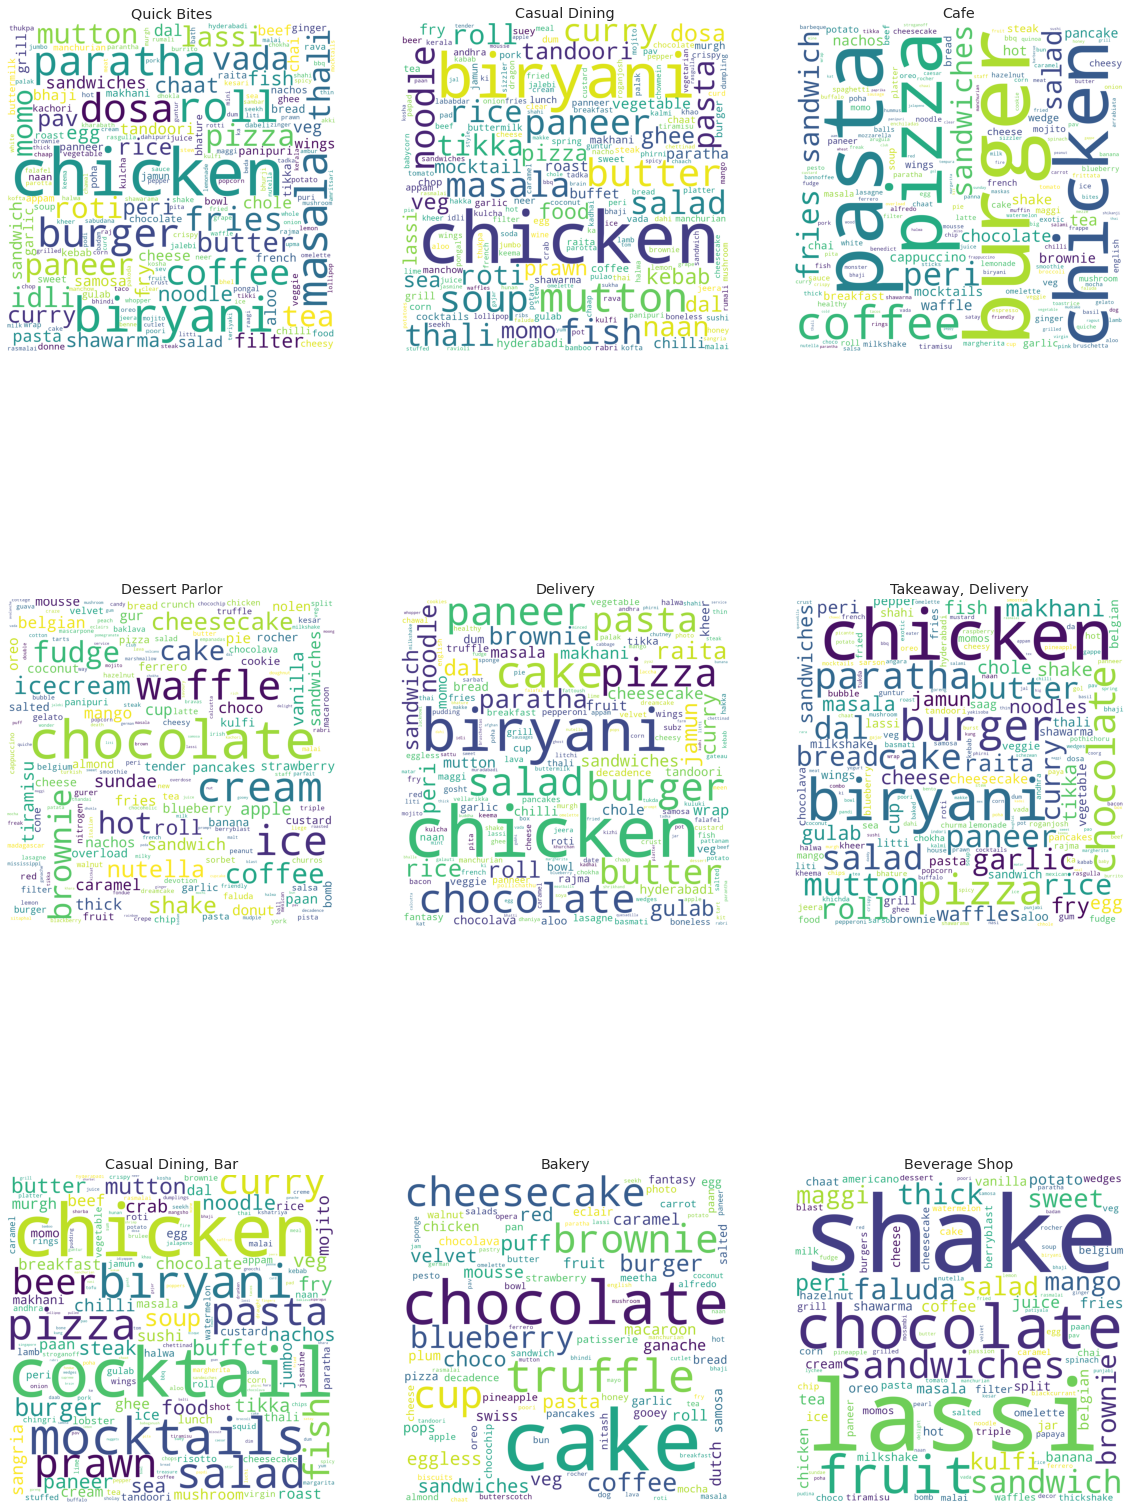

In [126]:
stopwords = set(STOPWORDS)
produce_wordcloud(rest_type)

### Review analysis

In [127]:
data_df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        Casual Dining   
1          Yes         No   4.1    787  Banashankari        Casual Dining   
2          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
3           No         No   3.7     88  Banashankari          Quick Bites   
4           No         No   3.8    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [128]:
dataset=data_df[data_df['rest_type']=='Quick Bites']

In [129]:
total_reviews = ''

for review in dataset['reviews_list']:
    review = review.lower()
    review = re.sub('[^a-zA-Z]',' ',review)
    review = re.sub('rated',' ',review)
    review = re.sub('x',' ',review)
    review = re.sub(' +',' ',review)
    total_reviews = total_reviews + str(review)
    


In [130]:
total_reviews

(-0.5, 799.5, 799.5, -0.5)

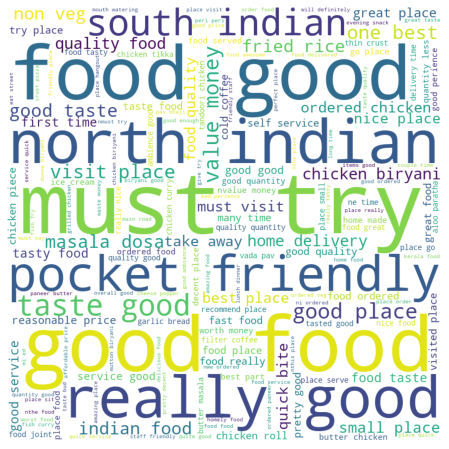

In [133]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white',
                     stopwords = stopwords, min_font_size = 10).generate(total_reviews)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')

In [134]:
def importance(rest):
    dataset = data_df[data_df['rest_type'] == rest]
    total_reviews = ''

    for review in dataset['reviews_list']:
        review = review.lower()
        review = re.sub('[^a-zA-Z]',' ',review)
        review = re.sub('rated',' ',review)
        review = re.sub('x',' ',review)
        review = re.sub(' +',' ',review)
        total_reviews = total_reviews + str(review)
        
    wordcloud = WordCloud(width = 800, height = 800, background_color = 'white',
                     stopwords = stopwords, min_font_size = 10).generate(total_reviews)

    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud)
    plt.axis('off')

    

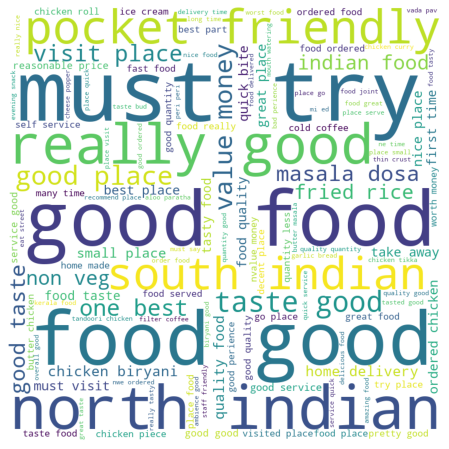

In [135]:
importance('Quick Bites')